In [456]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import re
import psycopg2 as ps
import seaborn as sns

In [457]:
## connect to postgres db

##conn = psycopg2.connect(database="nashville", user = "postgres", password = "postgres", host = "127.0.0.1", port = "5432")

##print ("Opened database successfully")
##cur_sv = conn.cursor()
##cur_sv.execute('select * from public.property_standards_violations LIMIT 1;')
##rows = cur_sv.fetchall()

##print(rows)


In [458]:
clean_data = pd.read_excel("/Users/Justin/GIT/data-question-2/violations2017.xlsx")

In [459]:
clean_data.head(20)

,VIOLATION_ID,ORG_ID,VIOLATION_TYPE,VIOLATION_DESC,VIOLATION_TEXT,REMEDIAL_TEXT,TABLE_NAME,EXPIRED_FLAG,DATE_EXPIRED,CREATED_BY,DATE_CREATED,MODIFIED_BY,DATE_MODIFIED,FEE_SETUP_ID,Unnamed: 14
0,1,1,BANNERS,Banners,Section 17.32.060 & 17.32.070 - Banners: Bann...,CAAZ_BANNERS,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
1,2,1,BGMATOWNER,Proper Maintenance Req - Owner,Section 16.16.030 (B) - Proper maintenance req...,CAAH_BG_MATOWNER,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
2,4,1,BLDGMAINT,Proper Maintenance Req,Section 16.16.030 (A) - Proper maintenance req...,CAAH_BLDG_MAINT,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
3,5,1,BLDGPERMIT,Building Permit Required,Section 16.28.010 - Building Permit Required: ...,CAAB_BLDG_PERMIT,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
4,6,1,BLDGSCOPE,Scope of Building Code,Section 16.16.020 (B) - The provisions of this...,CAAH_BLDG_SCOPE,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
5,7,1,BOARDINGRQ,Boarding Requirements,Section 16.24.340 (U) (2) – Boarding of Vacant...,CAAH_BOARDING_REQU,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
6,8,1,BOARDVAC,Boarding of Vacant Buildings,Section 16.24.340 (U) (1) – Boarding of Vacant...,CAAH_BOARDING_VABLDG,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
7,9,1,CARROW,Vehicle In The Right-Of-Way,Section 12.08.210 - Abandoned Vehicles: Abando...,CAMCL_SEW_CONCT,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
8,10,1,CERTCOMP,Certificate of Compliance Required,Section 17.40.580 - Certificate of Compliance:...,CAAZ_CERT_COMP,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
9,11,1,CERTOCC,Certificate of Occupancy Required,Section 16.24.130 – Certificate of Occupancy R...,CAAH_CERT_OCC,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN


In [460]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 15 columns):
VIOLATION_ID      928 non-null object
ORG_ID            789 non-null object
VIOLATION_TYPE    788 non-null object
VIOLATION_DESC    925 non-null object
VIOLATION_TEXT    666 non-null object
REMEDIAL_TEXT     345 non-null object
TABLE_NAME        137 non-null datetime64[ns]
EXPIRED_FLAG      651 non-null object
DATE_EXPIRED      2 non-null object
CREATED_BY        650 non-null float64
DATE_CREATED      651 non-null object
MODIFIED_BY       23 non-null object
DATE_MODIFIED     22 non-null datetime64[ns]
FEE_SETUP_ID      0 non-null float64
Unnamed: 14       0 non-null float64
dtypes: datetime64[ns](2), float64(3), object(10)
memory usage: 109.5+ KB


In [461]:
firstrows = clean_data[:300]

In [462]:
display(firstrows)

,VIOLATION_ID,ORG_ID,VIOLATION_TYPE,VIOLATION_DESC,VIOLATION_TEXT,REMEDIAL_TEXT,TABLE_NAME,EXPIRED_FLAG,DATE_EXPIRED,CREATED_BY,DATE_CREATED,MODIFIED_BY,DATE_MODIFIED,FEE_SETUP_ID,Unnamed: 14
0,1,1,BANNERS,Banners,Section 17.32.060 & 17.32.070 - Banners: Bann...,CAAZ_BANNERS,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
1,2,1,BGMATOWNER,Proper Maintenance Req - Owner,Section 16.16.030 (B) - Proper maintenance req...,CAAH_BG_MATOWNER,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
2,4,1,BLDGMAINT,Proper Maintenance Req,Section 16.16.030 (A) - Proper maintenance req...,CAAH_BLDG_MAINT,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
3,5,1,BLDGPERMIT,Building Permit Required,Section 16.28.010 - Building Permit Required: ...,CAAB_BLDG_PERMIT,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
4,6,1,BLDGSCOPE,Scope of Building Code,Section 16.16.020 (B) - The provisions of this...,CAAH_BLDG_SCOPE,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
5,7,1,BOARDINGRQ,Boarding Requirements,Section 16.24.340 (U) (2) – Boarding of Vacant...,CAAH_BOARDING_REQU,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
6,8,1,BOARDVAC,Boarding of Vacant Buildings,Section 16.24.340 (U) (1) – Boarding of Vacant...,CAAH_BOARDING_VABLDG,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
7,9,1,CARROW,Vehicle In The Right-Of-Way,Section 12.08.210 - Abandoned Vehicles: Abando...,CAMCL_SEW_CONCT,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
8,10,1,CERTCOMP,Certificate of Compliance Required,Section 17.40.580 - Certificate of Compliance:...,CAAZ_CERT_COMP,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN
9,11,1,CERTOCC,Certificate of Occupancy Required,Section 16.24.130 – Certificate of Occupancy R...,CAAH_CERT_OCC,NaT,N,NaN,1.0,2014-07-09 08:03:52.640000,NaN,NaT,NaN,NaN


In [463]:
#Moving the misentered data from row 15 up to the correct columns in row 14

firstrows.iloc[14,4] = str(firstrows.iloc[14,4]) + str(firstrows.iloc[15,0])
firstrows.iloc[14,5] = firstrows.iloc[15,1]
firstrows.iloc[14,6] = firstrows.iloc[15,2]
firstrows.iloc[14,7] = firstrows.iloc[15,3]
firstrows.iloc[14,8] = firstrows.iloc[15,4]
firstrows.iloc[14,9] = firstrows.iloc[15,5]
firstrows.iloc[14,10] = firstrows.iloc[15,6]
firstrows.iloc[14,11] = firstrows.iloc[15,7]
firstrows.iloc[14,12] = firstrows.iloc[15,8]
firstrows.iloc[14,13] = firstrows.iloc[15,9]



/Users/Justin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [464]:
##attempting to create a loop to move info up one line and to the correct column

##for i, violation_id in enumerate('VIOLATION_ID'):
    ##if firstrows['vcount'].notnull:
        ##print(firstrows.vcount)
        #a = str(firstrows['VIOLATION_TEXT']) + str(firstrows['VIOLATION_ID'])
        #firstrows['VIOLATION_TEXT'] = a
        
##print(firstrows.head(20))

In [465]:
## Counting the number of times a word is repeated
text = clean_data['VIOLATION_DESC'].astype(str)
text = text.str.lower()

nash_vi_count = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

nash_vi_count.head(5)

                15.0
&                7.0
(brick           1.0
(doors)          2.0
(drop-cords)     1.0
dtype: float64

In [466]:
## Sorting word counts in descending order

nash_vi_count = nash_vi_count.sort_values(ascending = False)

In [467]:
nash_vi_count = nash_vi_count.reset_index()
nash_vi_count.columns = ['word','count']

## Counting the word length to eliminate common words or symbols
nash_vi_count['length'] = nash_vi_count.word.str.len()
nash_bool = nash_vi_count['length'] > 3
nash_count = nash_vi_count[nash_bool == True]
nash_count.reset_index()

,index,word,count,length
0,2,exterior,111.0,8
1,6,area,46.0,4
2,7,prop,44.0,4
3,8,bldgs,44.0,5
4,11,water,36.0,5
5,12,permit,34.0,6
6,14,required,32.0,8
7,15,buildings,31.0,9
8,17,prohibited,27.0,10
9,18,occupancy,26.0,9


> Searches 'violation_text' based on the first section of the code number (xx.xx.xxx), then runs a word count for our new subsection and exports the results as a .csv

In [468]:
#clean_data is the original .csv file
bool5 = clean_data['VIOLATION_TEXT'].str.contains(str('5.\d{1,3}.\d{,3}'))
viol5_df = clean_data[bool5== True]
viol5_df.head(20)

#Changing text to lowercase
text_5 = viol5_df['VIOLATION_DESC'].astype(str)
text_5 = text_5.str.lower()

#Word count
t5_vi_count = text_5.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

#Sort word count (descending)
t5_vi_count = t5_vi_count.sort_values(ascending = False)

#Formatting the table
t5_vi_count = t5_vi_count.reset_index()
t5_vi_count.columns = ['word','count']

#Remove words less than 3 characters, then reset the index
t5_vi_count['length'] = t5_vi_count.word.str.len()
t5_bool = t5_vi_count['length'] > 3
t5_count = t5_vi_count[t5_bool == True]
t5_count.reset_index()

#Export results to csv for analysis
#t5_count.to_csv("/Users/Justin/GIT/data-question-2/t5_count.csv")

,index,word,count,length
0,1,fire,18.0,4
1,2,permit,17.0,6
2,3,safety,14.0,6
3,4,required,13.0,8
4,5,escape,12.0,6
5,6,emergency,12.0,9
6,8,beer,12.0,4
7,9,supplier,11.0,8
8,11,homemade,9.0,8
9,12,transfer,9.0,8


In [469]:
## 6.xx.xxx

bool6 = clean_data['VIOLATION_TEXT'].str.contains(str('6.\d{1,3}.\d{,3}'))
viol6_df = clean_data[bool6== True]
viol6_df.head(20)

text_6 = viol6_df['VIOLATION_DESC'].astype(str)
text_6 = text_6.str.lower()

t6_vi_count = text_6.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

t6_vi_count = t6_vi_count.sort_values(ascending = False)

t6_vi_count = t6_vi_count.reset_index()
t6_vi_count.columns = ['word','count']

t6_vi_count['length'] = t6_vi_count.word.str.len()
t6_bool = t6_vi_count['length'] > 3
t6_count = t6_vi_count[t6_bool == True]
t6_count.reset_index()

#t6_count.to_csv("/Users/Justin/GIT/data-question-2/t6_count.csv")

,index,word,count,length
0,1,exterior,105.0,8
1,3,area,45.0,4
2,4,bldgs,44.0,5
3,5,prop,44.0,4
4,6,buildings,31.0,9
5,8,occupancy,26.0,9
6,9,required,19.0,8
7,10,fire,18.0,4
8,11,plumbing,16.0,8
9,12,system,16.0,6


In [470]:
## 7.xx.xxx

bool7 = clean_data['VIOLATION_TEXT'].str.contains(str('7.\d{1,3}.\d{,3}'))
viol7_df = clean_data[bool7== True]
viol7_df.head(20)

text_7 = viol7_df['VIOLATION_DESC'].astype(str)
text_7 = text_7.str.lower()

t7_vi_count = text_7.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

t7_vi_count = t7_vi_count.sort_values(ascending = False)

t7_vi_count = t7_vi_count.reset_index()
t7_vi_count.columns = ['word','count']

t7_vi_count['length'] = t7_vi_count.word.str.len()
t7_bool = t7_vi_count['length'] > 3
t7_count = t7_vi_count[t7_bool == True]
t7_count.reset_index()

#t7_count.to_csv("/Users/Justin/GIT/data-question-2/t7_count.csv")

,index,word,count,length
0,2,permit,28.0,6
1,3,signs,23.0,5
2,4,sign,21.0,4
3,5,prohibited,19.0,10
4,7,beer,16.0,4
5,9,required,14.0,8
6,10,sales,14.0,5
7,12,sale,14.0,4
8,13,transfer,11.0,8
9,15,supplier,11.0,8


In [471]:
## 8.xx.xxx

bool8 = clean_data['VIOLATION_TEXT'].str.contains(str('8.\d{1,3}.\d{,3}'))
viol8_df = clean_data[bool8== True]
viol8_df.head(20)

text_8 = viol8_df['VIOLATION_DESC'].astype(str)
text_8 = text_8.str.lower()

t8_vi_count = text_8.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

t8_vi_count = t8_vi_count.sort_values(ascending = False)

t8_vi_count = t8_vi_count.reset_index()
t8_vi_count.columns = ['word','count']

t8_vi_count['length'] = t8_vi_count.word.str.len()
t8_bool = t8_vi_count['length'] > 3
t8_count = t8_vi_count[t8_bool == True]
t8_count.reset_index()

#t8_count.to_csv("/Users/Justin/GIT/data-question-2/t8_count.csv")

,index,word,count,length
0,1,permit,14.0,6
1,3,sale,7.0,4
2,5,caterer,6.0,7
3,6,sales,6.0,5
4,7,required,6.0,8
5,8,unauthorized,5.0,12
6,9,under,5.0,5
7,10,application,5.0,11
8,12,beer,4.0,4
9,13,lighting,4.0,8


In [472]:
## 10.xx.xxx

bool10 = clean_data['VIOLATION_TEXT'].str.contains(str('10.\d{1,3}.\d{,3}'))
viol10_df = clean_data[bool10== True]
viol10_df.head(20)

text_10 = viol10_df['VIOLATION_DESC'].astype(str)
text_10 = text_10.str.lower()

t10_vi_count = text_10.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

t10_vi_count = t10_vi_count.sort_values(ascending = False)

t10_vi_count = t10_vi_count.reset_index()
t10_vi_count.columns = ['word','count']

t10_vi_count['length'] = t10_vi_count.word.str.len()
t10_bool = t10_vi_count['length'] > 3
t10_count = t10_vi_count[t10_bool == True]
t10_count.reset_index()

#t10_count.to_csv("/Users/Justin/GIT/data-question-2/t10_count.csv")

,index,word,count,length
0,0,litter,11.0,6
1,2,garbage,8.0,7
2,5,property,5.0,8
3,7,dumping,4.0,7
4,8,harborage,4.0,9
5,9,waste,4.0,5
6,11,illegal,3.0,7
7,12,private,3.0,7
8,13,public,3.0,6
9,14,water,3.0,5


In [473]:
## 12.xx.xxx

bool12 = clean_data['VIOLATION_TEXT'].str.contains(str('12.\d{1,3}.\d{,3}'))
viol12_df = clean_data[bool12== True]
viol12_df.head(20)

text_12 = viol12_df['VIOLATION_DESC'].astype(str)
text_12 = text_12.str.lower()

t12_vi_count = text_12.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

t12_vi_count = t12_vi_count.sort_values(ascending = False)

t12_vi_count = t12_vi_count.reset_index()
t12_vi_count.columns = ['word','count']

t12_vi_count['length'] = t12_vi_count.word.str.len()
t12_bool = t12_vi_count['length'] > 3
t12_count = t12_vi_count[t12_bool == True]
t12_count.reset_index()

#t12_count.to_csv("/Users/Justin/GIT/data-question-2/t12_count.csv")

,index,word,count,length
0,0,fence,9.0,5
1,1,height,9.0,6
2,3,right-of-way,5.0,12
3,5,setback,4.0,7
4,6,(open),2.0,6
5,8,front,2.0,5
6,10,inside,2.0,6
7,11,mobile,2.0,6
8,12,(opaque),2.0,8
9,13,vending,2.0,7


In [474]:
## 15.xx.xxx

bool15 = clean_data['VIOLATION_TEXT'].str.contains(str('15.\d{1,3}.\d{,3}'))
viol15_df = clean_data[bool15== True]
viol15_df.head(20)

text_15 = viol15_df['VIOLATION_DESC'].astype(str)
text_15 = text_15.str.lower()

t15_vi_count = text_15.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

t15_vi_count = t15_vi_count.sort_values(ascending = False)

t15_vi_count = t15_vi_count.reset_index()
t15_vi_count.columns = ['word','count']

t15_vi_count['length'] = t15_vi_count.word.str.len()
t15_bool = t15_vi_count['length'] > 3
t15_count = t15_vi_count[t15_bool == True]
t15_count.reset_index()

#t15_count.to_csv("/Users/Justin/GIT/data-question-2/t15_count.csv")

,index,word,count,length
0,0,sewage,5.0,6
1,2,runoff,2.0,6
2,3,connect,2.0,7
3,4,ground,2.0,6
4,5,landlord,2.0,8
5,7,public,2.0,6
6,8,registration,2.0,12
7,11,septic,1.0,6
8,12,improperly,1.0,10
9,13,body,1.0,4


In [475]:
## 16.xx.xxx

bool16 = clean_data['VIOLATION_TEXT'].str.contains(str('16.\d{1,3}.\d{,3}'))
viol16_df = clean_data[bool16== True]
viol16_df.head(20)

text_16 = viol16_df['VIOLATION_DESC'].astype(str)
text_16 = text_16.str.lower()

t16_vi_count = text_16.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

t16_vi_count = t16_vi_count.sort_values(ascending = False)

t16_vi_count = t16_vi_count.reset_index()
t16_vi_count.columns = ['word','count']

t16_vi_count['length'] = t16_vi_count.word.str.len()
t16_bool = t16_vi_count['length'] > 3
t16_count = t16_vi_count[t16_bool == True]
t16_count.reset_index()

#t16_count.to_csv("/Users/Justin/GIT/data-question-2/t16_count.csv")

,index,word,count,length
0,1,exterior,105.0,8
1,3,area,45.0,4
2,4,bldgs,44.0,5
3,5,prop,44.0,4
4,6,buildings,30.0,9
5,8,occupancy,24.0,9
6,9,fire,18.0,4
7,10,system,16.0,6
8,11,plumbing,16.0,8
9,12,required,15.0,8


In [476]:
## 17.xx.xxx

bool17 = clean_data['VIOLATION_TEXT'].str.contains(str('17.\d{1,3}.\d{,3}'))
viol17_df = clean_data[bool17== True]
viol17_df.head(20)

text_17 = viol17_df['VIOLATION_DESC'].astype(str)
text_17 = text_17.str.lower()

t17_vi_count = text_17.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

t17_vi_count = t17_vi_count.sort_values(ascending = False)

t17_vi_count = t17_vi_count.reset_index()
t17_vi_count.columns = ['word','count']

t17_vi_count['length'] = t17_vi_count.word.str.len()
t17_bool = t17_vi_count['length'] > 3
t17_count = t17_vi_count[t17_bool == True]
t17_count.reset_index()

#t17_count.to_csv("/Users/Justin/GIT/data-question-2/t17_count.csv")

,index,word,count,length
0,1,signs,23.0,5
1,2,sign,19.0,4
2,3,prohibited,19.0,10
3,4,permit,10.0,6
4,5,required,10.0,8
5,6,fence,9.0,5
6,7,height,9.0,6
7,10,home,6.0,4
8,11,overcrowding,5.0,12
9,13,sale,5.0,4


In [477]:
## 57.xx.xxx

bool57 = clean_data['VIOLATION_TEXT'].str.contains(str('57.\d{1,3}.\d{,3}'))
viol57_df = clean_data[bool57== True]
viol57_df.head(20)

text_57 = viol57_df['VIOLATION_DESC'].astype(str)
text_57 = text_57.str.lower()

t57_vi_count = text_57.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

t57_vi_count = t57_vi_count.sort_values(ascending = False)

t57_vi_count = t57_vi_count.reset_index()
t57_vi_count.columns = ['word','count']

t57_vi_count['length'] = t57_vi_count.word.str.len()
t57_bool = t57_vi_count['length'] > 3
t57_count = t57_vi_count[t57_bool == True]
t57_count.reset_index()

#t57_count.to_csv("/Users/Justin/GIT/data-question-2/t57_count.csv")

,index,word,count,length
0,0,beer,12.0,4
1,1,supplier,11.0,8
2,3,transfer,9.0,8
3,4,permit,9.0,6
4,5,homemade,9.0,8
5,6,sales,7.0,5
6,7,wholesaler,7.0,10
7,8,require,5.0,7
8,11,improper,4.0,8
9,16,wholesale,4.0,9


In [478]:
t5_count['code'] = '5.xx.xxx'
t7_count['code'] = '7.xx.xxx'
t8_count['code'] = '8.xx.xxx'
t10_count['code'] = '10.xx.xxx'
t12_count['code'] = '12.xx.xxx'
t15_count['code'] = '15.xx.xxx'
t16_count['code'] = '16.xx.xxx'
t17_count['code'] = '17.xx.xxx'
t57_count['code'] = '57.xx.xxx'

/Users/Justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [479]:
word_count = [t5_count, t7_count, t8_count, t10_count, t12_count, t15_count, t16_count, t17_count, t57_count]

In [480]:
count_list = pd.concat(word_count, ignore_index = True).astype(str)
count_list.sort_values(['count'], ascending = False)
count_list.head(20)
# count_list.to_csv("/Users/Justin/GIT/data-question-2/count_list.csv")

,word,count,length,code
0,fire,18.0,4,5.xx.xxx
1,permit,17.0,6,5.xx.xxx
2,safety,14.0,6,5.xx.xxx
3,required,13.0,8,5.xx.xxx
4,escape,12.0,6,5.xx.xxx
5,emergency,12.0,9,5.xx.xxx
6,beer,12.0,4,5.xx.xxx
7,supplier,11.0,8,5.xx.xxx
8,homemade,9.0,8,5.xx.xxx
9,transfer,9.0,8,5.xx.xxx


In [481]:
## Finding words that repeat across the different codes

wcount = count_list['word']
wcount = wcount.groupby(lambda x: wcount[x]).count()
wcount = wcount.sort_values()

In [482]:
## Narrowing down on the unique values

wc_bool = wcount > 1
wcount = wcount[wc_bool == True]
wcount = wcount.reset_index()
#wcount.columns = ['word','freq']

In [483]:
## Generating the count/code properties for our uniques values via union

unique_key = pd.merge(count_list, wcount, how='inner', on = 'word')
del unique_key['length']
unique_key = unique_key.groupby('code')

unique_key.head(20)

,word,count,code,index


> Pulling similar data sets from other cities to see how they categorize their violations

In [484]:
##Austin Data Set

austin_data = pd.read_csv('/Users/Justin/Documents/Violation_data/Austin_Violations.csv')

In [485]:
aust_vi_count = austin_data['DESCRIPTION'].value_counts()

aust_vi_count.head(20)

Property Abatement                  36626
Land Use Violation(s)               17522
Structure Condition Violation(s)    14261
Work Without Permit                  4052
SWS Chp 15 Violation(s)               149
Structure Condition Violations          7
Unknown                                 5
                                        3
Land Use Violations                     1
Name: DESCRIPTION, dtype: int64

In [486]:
##Chatanooga Data Set

chat_data = pd.read_csv('/Users/Justin/Documents/Violation_data/Chat_Violations.csv')

chat_data.head(50)

,Case Number,311 Case Number,Date Entered,Date Closed,Violation Description,Status,Street Number,Street Name,City,State,Latitude,Longitude,Location
0,CE20170008186,NaN,09/26/2017,10/03/2017,Overgrowth,Closed,1017,OAK ST,CHATTANOOGA,TN,35.042782,-85.290188,"(35.042781712000078, -85.290188488999945)"
1,CE20160004349,16-00048915,05/18/2016,06/06/2016,Litter,Closed,303,ASBURY DR,CHATTANOOGA,TN,35.010841,-85.233394,"(35.010841391, -85.23339419)"
2,CE20170007823,NaN,09/15/2017,10/03/2017,Litter,Closed,2108,E 18TH ST,CHATTANOOGA,TN,35.022265,-85.278551,"(35.022265373, -85.278550825999957)"
3,CE20160000800,16-00009692,02/10/2016,02/25/2016,Vehicle - Private Property,Closed,0,CALHOUN AVE,Chattanooga,TN,NaN,NaN,NaN
4,CE20150009076,15-00106051,09/02/2015,10/19/2015,Overgrowth - Vacant Lot,Closed,0,CORDELIA LN,CHATTANOOGA,TN,NaN,NaN,NaN
5,CE20160003356,16-00037845,04/25/2016,05/02/2016,Overgrowth - Vacant Lot,Closed,0,SHARP ST,Chattanooga,TN,NaN,NaN,NaN
6,CE20160007631,16-00089498,08/25/2016,08/29/2016,Overgrowth,Closed,1605,STARBOARD DR,HIXSON,TN,35.123635,-85.208011,"(35.123635274, -85.20801124)"
7,CE20170007516,NaN,08/31/2017,10/03/2017,Overgrowth - Vacant Lot,Closed,2405,KIRBY AVE,CHATTANOOGA,TN,35.029127,-85.269798,"(35.029127069, -85.269797951999976)"
8,CE20170004083,NaN,06/09/2017,06/23/2017,Overgrowth,Closed,3203,7TH AVE,CHATTANOOGA,TN,35.005596,-85.282679,"(35.005595855, -85.282679494999968)"
9,CE20160004254,16-00048023,05/17/2016,06/06/2016,Overgrowth - Vacant Lot,Closed,2502,BAILEY AVE,CHATTANOOGA,TN,35.030131,-85.267351,"(35.030130812, -85.26735122)"


In [487]:
chat_vi_count = chat_data['Violation Description'].value_counts()

chat_vi_count.head(50)

Overgrowth                    47506
Litter                        43617
Housing                       24426
Vehicle - Private Property    18844
Overgrowth - Vacant Lot       10903
Vehicle - On Street            5759
Dumping                        1435
Brush and Trash                 191
Garbage Set-Out                 165
Emergency Demo                    4
Name: Violation Description, dtype: int64

In [488]:
##Hartford Data Set

hart_data = pd.read_csv('/Users/Justin/Documents/Violation_data/Hartford_Violations.csv')

hart_data.head()

,Case Number,Parcel ID,Location,Location Description,Title,Complaint Violation,Open Date,Closed Date,Global Entity Name,First Name,Last Name,Inspector First Name,Inspector Last Name,geom
0,20638,153181001,191 WOODLAND DR,NaN,Housing Code Inspector,Certificate of Apartment Occupancy,04/11/2011,NaN,ST FRANCIS HOSPITAL OF HTFD,NaN,NaN,Tonja,Nelson,"(41.778834958931, -72.7014114629223)"
1,20767,169014054,665 BLUE HILLS AV,NaN,Public Health Inspector,Housing Code Enforcement,04/15/2011,04/18/2011,GETHSEMANE CHURCH OF GOD IN CHRIST INC,NaN,NaN,Dan,Lusa,"(41.8054656592273, -72.6957818013674)"
2,20621,250580229,38 BENTON ST,NaN,Public Health Inspector,Housing Code Enforcement,04/08/2011,NaN,SANCHEZ JOSE,NaN,NaN,Dan,Lusa,"(41.7475761674453, -72.6754478154558)"
3,20676,219217018,204 MAGNOLIA ST,NaN,Housing Code Inspector,Housing Code Enforcement,04/12/2011,NaN,88 NELSON REALTY LLC,NaN,NaN,Tonja,Nelson,"(41.7828839791892, -72.6864010685163)"
4,20763,164614240,587 BROADVIEW TER,NaN,Public Health Inspector,Rodent (HCE),04/18/2011,04/15/2011,ORTIZ IRIS C,NaN,NaN,Dan,Lusa,"(41.7362744629431, -72.7013272474807)"


In [489]:
hart_vi_count = hart_data['Complaint Violation'].value_counts()

hart_vi_count.head(50)

Housing Code Enforcement              12242
Certificate of Apartment Occupancy     3988
Essential Services                     2130
Bed Bugs (HCE)                         1301
Rodent (HCE)                            706
Rooming House / Hotel                   265
Vacate (HCE)                            184
Placards                                117
Fair Rent                                86
Emergency After Hours                    26
CAO Preventative                          3
Pest                                      2
Name: Complaint Violation, dtype: int64

In [490]:
##Kansas City Data Set

kc_data = pd.read_csv('/Users/Justin/Documents/Violation_data/KC_Violations.csv')

kc_data.head()

/Users/Justin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Property Violation ID,Case ID,Status,Case Opened Date,Case Closed Date,Days Open,Violation Code,Violation Description,Ordinance Number,Ordinance Chapter,...,State,Zip Code,Latitude,Longitude,KIVA PIN,Council District,Police Patrol Area,Inspection Area,Neighborhood,Code Violation Location
0,1082590,2013007106,Closed,01/18/2013,04/04/2013,67.0,NSEXTWAL03,ROTTING BOARDS ON EXTERIOR WALL,56-132 (A) C.O.,56,...,MO,64110.0,39.05223,-94.57551,133587,4.0,Central,78,South Hyde Park,"4109 CHARLOTTE ST\nMO 64110\n(39.05223, -94.57..."
1,1167308,2016121615,Closed,09/29/2016,06/05/2017,249.0,NSWLOPSTOR,UNAPPROVED STORAGE,48-32 C.O.,48,...,MO,64129.0,39.03082,-94.49209,51403,3.0,Metro,43,Eastwood Hills East,"5114 SYCAMORE AVE\nMO 64129\n(39.03082, -94.49..."
2,1121792,2014114280,Closed,09/03/2014,04/14/2015,223.0,NSTREE04,HAZARDOUS TREE BRANCHES,48-29 C.O.,48,...,MO,64134.0,38.91244,-94.50213,73684,6.0,South,173,Kirkside,"11614 MANCHESTER AVE\nMO 64134\n(38.91244, -94..."
3,1147988,2015127648,Closed,10/23/2015,NaN,452.0,NSWLVEH01,UNAPPROVED PARKING,48-28 C.O.,48,...,MO,64117.0,39.16647,-94.52383,76262,1.0,Shoal Creek,198,Chouteau Estates,"4701 NE PARVIN RD\nMO 64117\n(39.16647, -94.52..."
4,1091658,2013072945,Closed,05/31/2013,06/05/2014,272.0,NSWLWEED,RANK WEEDS OR UNATTENDED GROWTH,48-30 C.O.,48,...,MO,64114.0,38.92443,-94.59227,155254,6.0,South,148,Red Bridge South,"11145 WORNALL RD\nMO 64114\n(38.92443, -94.59227)"


In [491]:
kc_vi_count = kc_data['Violation Description'].value_counts()

kc_vi_count.head(50)

LITTER, TRASH, REFUSE, AND RUBBISH          82111
RANK WEEDS OR UNATTENDED GROWTH             68887
UNAPPROVED STORAGE                          61859
LIMBS AND BRUSH                             31769
PEELING, CRACKED, BLISTERED PAINT           26466
FAILURE TO REGISTER VACANT PROPERTY         24289
FAILURE TO REGISTER RENTAL DWELLING         19661
UNLICENSED VEHICLE                          17767
EXTERIOR SURFACE MATERIAL NOT PROTECTED     16150
UNAPPROVED PARKING                          14784
RANK WEEDS                                  13404
PAINTING NEEDED ON EXTERIOR WALL TRIM       13047
GENERAL DISREPAIR (GUTTER)                   8205
PANES ARE CRACKED, BROKEN OR MISSING         6730
ALL FENCES AND RET. WALLS KEPT IN REPAIR     6485
ANY BUILDING OR STRUCTURE OPEN TO ENTRY      6198
EXTERIOR SIDING MISSING                      5801
LOOSE, ROTTED, OR MISSING FASCIA BOARDS      5784
WRECKED, DAMAGED, OR DISABLED VEHICLE        5527
ACCUMULATION OF TRASH IN RIGHT OF WAY        5425


In [492]:
##Los Angeles Data Set

la_data = pd.read_csv('/Users/Justin/Documents/Violation_data/LA_Violations.csv')

la_data.head()

,Case Number,LADBS Inspection District,Address House Number,Address House Fraction Number,Address Street Direction,Address Street Name,Address Street Suffix,Address Street Suffix Direction,Address Zip,Date Case Generated,Date Case Closed,Parcel Identification Number (PIN),Case Type,Area Planning Commission (APC),Status of Case,Latitude/Longitude
0,143586,1114,1316.0,NaN,W,65TH,ST,NaN,90044.0,05/25/2005,01/10/2013,105B197 1500,GENERAL,South Los Angeles,O,"(33.98052, -118.2987)"
1,195751,2303,3932.0,NaN,S,BROADWAY,NaN,NaN,90037.0,03/11/2007,07/23/2016,115-5A203 85,VEIP,South Los Angeles,O,"(34.0115, -118.27815)"
2,233,2304,1855.0,NaN,W,GAGE,AVE,NaN,90047.0,10/27/2014,NaN,105B193 922,VEIP,South Los Angeles,O,"(33.98197, -118.3108)"
3,262090,8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/28/2012,NaN,135A229 144,BILLBOARDS,East Los Angeles,O,NaN
4,264349,8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/28/2012,NaN,138A235 6,BILLBOARDS,East Los Angeles,O,NaN


In [493]:
la_vi_count = la_data['Case Type'].value_counts()

la_vi_count.head(50)

GENERAL       8713
VEIP          1039
PACE           744
CNAP           371
CITATIONS      254
SIGNS          162
BILLBOARDS     127
LEA             65
FRP             13
XXX              1
Name: Case Type, dtype: int64

In [494]:
##New Orleans Data Set

no_data = pd.read_csv('/Users/Justin/Documents/Violation_data/NO_Violations.csv')

no_data.head(20)

,CaseID,ViolationID,CaseNo,Location,ViolationDate,CodeSection,Violation,Description,LastUpload
0,171833,547584,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:52:44 AM,28-11,28-11 Structure,Structural members shall be maintained structu...,02/18/2014 10:43:37 PM
1,171833,547585,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:53:03 AM,28-11,28-11 Floor Joists,Structural members including floor joists must...,02/18/2014 10:43:37 PM
2,171833,547590,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:53:55 AM,28-11,28-11 Studs,Structural members including studs must be mai...,02/18/2014 10:43:37 PM
3,171833,547592,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:54:20 AM,28-11,28-11 Rafters,Structural members including rafters must be m...,02/18/2014 10:43:37 PM
4,171833,547586,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:53:15 AM,28-13,28-13 Weatherboards,Exterior walls and weatherboards must be free ...,02/18/2014 10:43:37 PM
5,171833,547587,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:53:24 AM,28-13,28-13 Siding,Exterior walls and siding must be free from ho...,02/18/2014 10:43:37 PM
6,171833,547591,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:54:07 AM,28-13,28-13 Parapet Wall,"Exterior walls must be free from holes, breaks...",02/18/2014 10:43:37 PM
7,171833,547593,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:54:27 AM,28-14,28-14 Roof,"The roof and flashing must be sound, tight, an...",02/18/2014 10:43:37 PM
8,171833,547600,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:57:50 AM,28-15,28-15 Boarded and Secured,Unoccupied structures must be boarded and secu...,02/18/2014 10:43:37 PM
9,171833,547595,09-002855,6218-6220 Wainwright Dr,03/06/2013 10:55:28 AM,28-20,28-20 Rodent Harborage,All structures and exterior property must be k...,02/18/2014 10:43:37 PM


In [495]:
no_vi_count = no_data['CodeSection'].value_counts()

no_vi_count.head(100)

26-160(a)         14854
26-157            13896
26-161(a)         12336
28-33              8829
26-169             7856
26-172             7413
26-159             7320
26-167(b)          7261
26-171             6002
26-167(a)          5323
26-179             4923
28-11              4515
28-20              4413
28-25              3982
26-174             3806
28-14              3578
26-163             3397
28-13              3112
28-10              3108
26-181             2692
26-167(c)          2498
26-168             2372
28-29              2352
28-15              1959
26-176             1853
26-164             1602
26-175             1394
28-26               970
26-165              956
26-178              912
                  ...  
26-158              430
26-184              410
28-12               376
26-183              332
28-28               294
28-22               289
26-166              264
28-21(a)            227
26-180              188
26-201              115
28-23           

In [496]:
##New Orleans Data Set

sea_data = pd.read_csv('/Users/Justin/Documents/Violation_data/Seattle_Violations.csv')

sea_data.head(20)

,Case Number,Case Type,Address,Description,Case Group,Date Case Created,Last Inspection Date,Last Inspection Result,Status,Permit and Complaint Status URL,Latitude,Longitude,Location
0,1039286,TENANT RELOCATION ORDINANCE,1724 11TH AVE,Issuance of Owner's Certification of No Displa...,TENANT RELOCATION ASSIST ORD,01/20/2017,NaN,NaN,ADMINISTRATIVE CLOSURE,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.617182,-122.317827,"1724 11TH AVE\n(47.61718246, -122.31782678)"
1,1039274,TENANT RELOCATION ORDINANCE,2027 S WASHINGTON ST,Issuance of Certification of No Displacement.,TENANT RELOCATION ASSIST ORD,01/19/2017,NaN,NaN,ADMINISTRATIVE CLOSURE,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.600637,-122.305150,"2027 S WASHINGTON ST\n(47.60063701, -122.30515..."
2,1039267,HOUSING / ZONING,4840 CALIFORNIA AVE SW,1/17/17 rf Observed subject property to have e...,HOUSING,01/18/2017,01/17/2017,FAILED,OPEN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.558019,-122.386528,"4840 CALIFORNIA AVE SW\n(47.55801855, -122.386..."
3,1039263,HOUSING / ZONING,1414 S COLUMBIAN WAY,01/18/2017 ED- Several HBMC violation. Smoke d...,HOUSING,01/18/2017,01/18/2017,FAILED,OPEN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.571994,-122.314297,"1414 S COLUMBIAN WAY\n(47.57199355, -122.31429..."
4,1039254,HOUSING / ZONING,2410 E LYNN ST,"1/13/17- Observed no heat in the unit, temp. i...",HOUSING,01/13/2017,01/18/2017,PASSED,VOLUNTARY COMPLIANCE,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.639828,-122.301827,"2410 E LYNN ST\n(47.63982828, -122.30182736)"
5,1039244,CONSTRUCTION,3515 S FERDINAND ST,Permit 6222536 received final approval on 10/1...,BUILDING,01/12/2017,10/18/2016,PASSED,VOLUNTARY COMPLIANCE,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.557698,-122.288156,"3515 S FERDINAND ST\n(47.55769818, -122.28815605)"
6,1039243,CONSTRUCTION,2752 6TH AVE S,Permit 6454705 was issued 7/26/16 and received...,BUILDING,01/12/2017,08/23/2016,PASSED,VOLUNTARY COMPLIANCE,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.578336,-122.325642,"2752 6TH AVE S\n(47.57833626, -122.32564203)"
7,1039238,TENANT RELOCATION ORDINANCE,804 N MOTOR PL,Application for a Tenant Relocation License. T...,TENANT RELOCATION ASSIST ORD,01/11/2017,NaN,NaN,OPEN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.658818,-122.348311,"804 N MOTOR PL\n(47.65881773, -122.34831133)"
8,1039228,TENANT RELOCATION ORDINANCE,2573 13TH AVE W,Issuance of Owner's Certification of Occupancy...,TENANT RELOCATION ASSIST ORD,01/10/2017,NaN,NaN,ADMINISTRATIVE CLOSURE,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.642803,-122.373902,"2573 13TH AVE W\n(47.64280333, -122.37390237)"
9,1039226,TENANT RELOCATION ORDINANCE,4426 4TH AVE NE,Issuance of Owner's Certification of Occupancy...,TENANT RELOCATION ASSIST ORD,01/09/2017,NaN,NaN,ADMINISTRATIVE CLOSURE,http://web6.seattle.gov/dpd/PermitStatus/Proje...,47.661050,-122.323737,"4426 4TH AVE NE\n(47.66105047, -122.32373743)"


In [497]:
sea_vi_count = sea_data['Case Group'].value_counts()

sea_vi_count.head(100)

ZONING                          14643
WEEDS AND VEGETATION             7141
BUILDING                         4691
HOUSING                          4398
VACANT BUILDING                  3073
SITE                             1506
JUST CAUSE EVICTION               874
TENANT RELOCATION ASSIST ORD      418
SIGNS                             355
CONDO/COOP CONVERSION             310
ELECTRICAL                        236
BUILDING AND PREMISES             227
CONSTRUCTION NOISE                197
MECHANICAL                        105
OTHER PROHIBITED ACTS             100
NONCONSTRUCTION NOISE              56
RENT RAISE/RRIO STDS NOT MET       24
TRAO AVOIDANCE                     14
OTHER CONSTRUCTION                 11
PRESALE                             8
PREMISES                            5
Name: Case Group, dtype: int64

In [498]:
##Virginia Beach Data Set

vb_data = pd.read_csv('/Users/Justin/Documents/Violation_data/VB_Violations.csv')

vb_data.head(20)

,Street Address,Zip Code,Sub-Division,Inspection Type,Case Type,Violation,Open Date,Closing Date,Location1
0,3117 FERRY FARM LN,23452-6528,PRINCESS ANNE PLAZA,Patrol,PROPERTY MAINTENANCE,SEC. 23-50b WEEDS AND GRASS,08/23/2016,08/24/2016,"3117 FERRY FARM LN\nVIRGINIA BEACH, VA 23452-6..."
1,4007 FRANCIS LEE DR,23452-1916,HOLLAND MEADOWS,Complaint,BUILDING_MAINT,604.3 ELECTRICAL SYSTEM HAZARDS,02/12/2016,02/18/2016,"4007 FRANCIS LEE DR\nVIRGINIA BEACH, VA 23452-..."
2,2020 ROUND HILL DR,23456,MASTER CARDS,Patrol,PROPERTY MAINTENANCE,SEC. 23-50b WEEDS AND GRASS,06/17/2016,09/16/2016,"2020 ROUND HILL DR\nVIRGINIA BEACH, VA 23456\n..."
3,5400 STONEHAVEN DR,23464-7014,CHARLESTOWNE,Patrol,BUILDING_MAINT,304.7 GUTTERS,02/09/2016,03/07/2016,"5400 STONEHAVEN DR\nVIRGINIA BEACH, VA 23464-7..."
4,6025 EDGELAKE DR,23464-4905,LEVEL GREEN TH THE VILLAGES,Patrol,INOPERABLE VEHICLES,16-40 INOPERABLE VEHICLE,03/15/2017,05/01/2017,"6025 EDGELAKE DR\nVIRGINIA BEACH, VA 23464-490..."
5,4425 DELRAY DR,23455-4533,THOROUGHGOOD/BLACKTHORNE,Complaint,RED_TAG,604.3 ELECTRICAL SYSTEM HAZARDS,12/27/2016,02/03/2017,"4425 DELRAY DR\nVIRGINIA BEACH, VA 23455-4533\..."
6,137 WAVERLY DR,23452-4325,PRINCESS ANNE PLAZA,Patrol,PROPERTY MAINTENANCE,"SEC. 23-50a TRASH, GARBAGE, LITTER",06/27/2017,07/06/2017,"137 WAVERLY DR\nVIRGINIA BEACH, VA 23452-4325\..."
7,1512 INDEPENDENCE BLVD,23455-4215,FENTRESS TOWN,Patrol,PROPERTY MAINTENANCE,"SEC. 23-50a TRASH, GARBAGE, LITTER",03/10/2016,03/15/2016,"1512 INDEPENDENCE BLVD\nVIRGINIA BEACH, VA 234..."
8,3536 RAINTREE RD,23452-4204,PRINCESS ANNE PLAZA,Patrol,PROPERTY MAINTENANCE,SEC. 23-50b WEEDS AND GRASS,07/27/2016,08/03/2016,"3536 RAINTREE RD\nVIRGINIA BEACH, VA 23452-420..."
9,3128 ASHLAWN TER,23452-6510,PRINCESS ANNE PLAZA,Patrol,INOPERABLE VEHICLES,16-41.2 PARKING AND STORAGE OF RECREATIONAL EQ...,02/13/2017,03/06/2017,"3128 ASHLAWN TER\nVIRGINIA BEACH, VA 23452-651..."


In [499]:
vb_vi_count = vb_data['Case Type'].value_counts()

vb_vi_count.head(100)

PROPERTY MAINTENANCE    30849
BUILDING_MAINT          14418
INOPERABLE VEHICLES      8548
WASTE_MANAGEMENT         2967
RED_TAG                  1663
Name: Case Type, dtype: int64

> Bringing in the Property Standards data

In [500]:
live_vi = pd.read_csv("/Users/Justin/GIT/data-question-2-xtreme-united/Property_Standards_Violations.csv")

In [501]:
live_vi.head(20)

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location
0,17-1156755,05/04/2017,05814005400,121 QUEENS LN,NASHVILLE,TN,37218.0,"LUSTER, PATRICIA",EMAIL,HOW TAKEN: EMAIL\nHigh grass,DONE,1.0,07/13/2017,Violation Inspection - PS,VIORES,HIGH WEEDS,"121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718..."
1,17-1165789,08/24/2017,08116056500,1007 11TH AVE N,NASHVILLE,TN,37208.0,"SARGENT, THOMAS JR. & CHRISTINE",OTHER SOURCE,High grass/weeds.,DONE,19.0,08/24/2017,Initial Violation Inspection - PS,PSNVF,NaN,"1007 11TH AVE N\nNASHVILLE, TN 37208\n(36.1702..."
2,17-1157131,05/09/2017,10703001600,715 ERMAC DR,NASHVILLE,TN,37214.0,"H.H. HERITAGE INN OF NASHVILLE, LLC",PHONE,High grass & weeds,DONE,15.0,07/13/2017,Env Court 1st Setting - PS,DMJCFINE,HIGH WEEDS,"715 ERMAC DR\nNASHVILLE, TN 37214\n(36.146283,..."
3,17-1161502,07/06/2017,07116009000,903 BLUE RIDGE DR,NASHVILLE,TN,37207.0,"SIMMONS, MABLINE P.",PHONE,Inoperable vehicle on row.,DONE,5.0,08/24/2017,Initial Violation Inspection - PS,PSNVF,NaN,"903 BLUE RIDGE DR\nNASHVILLE, TN 37207\n(36.19..."
4,17-1153921,03/06/2017,11813018100,3605B MAYFLOWER PL,NASHVILLE,TN,37204.0,"ROBISON, ALEXANDER B. ET UX",PHONE,"Junk, trash & debris",DONE,25.0,04/06/2017,Violation Inspection - PS,VIORES,"OPEN STORAGE, JUNK, TRASH, DEBRIS","3605B MAYFLOWER PL\nNASHVILLE, TN 37204\n(36.1..."
5,17-1156955,05/08/2017,12001009000,1202 VULTEE BLVD,NASHVILLE,TN,37217.0,"BARRETT, MALCOLM L. JR.",PHONE,Couch in the front ditch,DONE,13.0,07/13/2017,Env Court 1st Setting - PS,DMJUSTCT,"OPEN STORAGE, JUNK, TRASH, DEBRIS","1202 VULTEE BLVD\nNASHVILLE, TN 37217\n(36.123..."
6,17-1165799,08/24/2017,10409011200,3723 RICHLAND AVE,NASHVILLE,TN,37205.0,"DUNDON, THOMAS H. & LEAH A.",Codes Online,advertising more guest than allowed on permit,OPEN,24.0,NaN,NaN,NaN,NaN,"3723 RICHLAND AVE\nNASHVILLE, TN 37205\n(36.13..."
7,17-1154514,03/20/2017,11613007600,5971 POST RD,NASHVILLE,TN,37205.0,"ELLIS, STEPHEN NICHOLAS & ODOM, KIMBERLY SUZANNE",PHONE,mattresses and trash on side of road.,DONE,23.0,04/06/2017,Violation Inspection - PS,VIORES,"OPEN STORAGE, JUNK, TRASH, DEBRIS","5971 POST RD\nNASHVILLE, TN 37205\n(36.107168,..."
8,15-1114246,02/11/2015,08102009600,1713 NUBELL ST,NASHVILLE,TN,37208.0,FREEDOM PROPERTIES,INSPECTOR REPORTED,VACANT/UNSECURED,DONE,2.0,12/08/2016,Final Sign-off - PS,VIORES,"EXTERIOR REPAIR,INTERIOR REPAIR","1713 NUBELL ST\nNASHVILLE, TN 37208\n(36.18863..."
9,17-1153010,02/10/2017,07103005200,2402 DICKERSON PIKE,NASHVILLE,TN,37207.0,"ALBARATI, AZIZ M. & HAUTER, AMIN",PHONE,Garage door unsecure - vacant building; food t...,DONE,5.0,07/13/2017,Env Court 1st Setting - PS,DMJCFINE,"Exterior of Buildings � Doors,USE NOT PERMITTED","2402 DICKERSON PIKE\nNASHVILLE, TN 37207\n(36...."


In [502]:
## Filling in null values with spaces so they can be combined into a new 'text' column.

live_vi['Reported Problem'] = live_vi['Reported Problem'].fillna(' ')
live_vi['Violations Noted'] = live_vi['Violations Noted'].fillna(' ')

live_vi['text'] = live_vi['Reported Problem']+live_vi['Violations Noted']
live_vi['text'] = live_vi['text'].str.lower()

live_vi.head(5)

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location,text
0,17-1156755,05/04/2017,05814005400,121 QUEENS LN,NASHVILLE,TN,37218.0,"LUSTER, PATRICIA",EMAIL,HOW TAKEN: EMAIL\nHigh grass,DONE,1.0,07/13/2017,Violation Inspection - PS,VIORES,HIGH WEEDS,"121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718...",how taken: email\nhigh grasshigh weeds
1,17-1165789,08/24/2017,08116056500,1007 11TH AVE N,NASHVILLE,TN,37208.0,"SARGENT, THOMAS JR. & CHRISTINE",OTHER SOURCE,High grass/weeds.,DONE,19.0,08/24/2017,Initial Violation Inspection - PS,PSNVF,,"1007 11TH AVE N\nNASHVILLE, TN 37208\n(36.1702...",high grass/weeds.
2,17-1157131,05/09/2017,10703001600,715 ERMAC DR,NASHVILLE,TN,37214.0,"H.H. HERITAGE INN OF NASHVILLE, LLC",PHONE,High grass & weeds,DONE,15.0,07/13/2017,Env Court 1st Setting - PS,DMJCFINE,HIGH WEEDS,"715 ERMAC DR\nNASHVILLE, TN 37214\n(36.146283,...",high grass & weedshigh weeds
3,17-1161502,07/06/2017,07116009000,903 BLUE RIDGE DR,NASHVILLE,TN,37207.0,"SIMMONS, MABLINE P.",PHONE,Inoperable vehicle on row.,DONE,5.0,08/24/2017,Initial Violation Inspection - PS,PSNVF,,"903 BLUE RIDGE DR\nNASHVILLE, TN 37207\n(36.19...",inoperable vehicle on row.
4,17-1153921,03/06/2017,11813018100,3605B MAYFLOWER PL,NASHVILLE,TN,37204.0,"ROBISON, ALEXANDER B. ET UX",PHONE,"Junk, trash & debris",DONE,25.0,04/06/2017,Violation Inspection - PS,VIORES,"OPEN STORAGE, JUNK, TRASH, DEBRIS","3605B MAYFLOWER PL\nNASHVILLE, TN 37204\n(36.1...","junk, trash & debrisopen storage, junk, trash,..."


In [503]:
##Running word count on combined text columns in live data set - later saved to a csv so I don't run the process again

#text2 = live_vi['text'].astype(str)
#text2 = text2.str.lower()

#live_vi_count = text2.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

#live_vi_count.head(5)

#live_vi_count.to_csv("/Users/Justin/GIT/data-question-2-xtreme-united/live_violations_word_count.csv")

In [504]:
live_vi_count = pd.read_csv('/Users/Justin/GIT/data-question-2-xtreme-united/live_violations_word_count.csv')
live_vi_count.columns = ['word','count']
live_vi_count.head(10)

,word,count
0,\n&,1.0
1,\n3,1.0
2,\nport,1.0
3,!!!,5.0
4,!!!\nabandoned,1.0
5,!!!\nillegal,1.0
6,!!!\nparking,1.0
7,!!!\nreported,1.0
8,!!!\nthis,1.0
9,!!!!high,1.0


In [505]:
live_vi_count = live_vi_count.sort_values('count',ascending = False)

live_vi_count['length'] = live_vi_count.word.str.len()
live_bool = live_vi_count['length'] > 3
live_count = live_vi_count[live_bool == True]

live_count.reset_index()

live_count.head(10)

,word,count,length
7035,"junk,",12513.0,5.0
12523,"trash,",11416.0,6.0
11692,"storage,",10540.0,8.0
3668,debris,9610.0,6.0
1691,area,8528.0,4.0
9641,prop,8360.0,4.0
13511,weeds,8282.0,5.0
5596,grass,7888.0,5.0
6078,high,7788.0,4.0
12519,trash,6453.0,5.0


>Violation Dictionary (not currently being used)

In [506]:
cat_vio_dict = {'prop':['repair', 'porch', 'pool', 'odor', 'graffiti', 'dilapidated', 'storage', 'potholes', 'holes', 'hole', 'exposed', 'fire', 'fence'],
                'water':['sewer', 'water', 'hydrant'],
                'occupancy':['occupancy', 'occupancy', 'tenant', 'landlord', 'lord'],
                'dumping':['couch', 'mattress', 'mattresses', 'couches', 'bed', 'tv', 'TV', 'abandoned'],
                'electrical':['electrical', 'wire', 'wiring'],
                'illegal_bus_op':['permit', 'sell', 'sale', 'advertising', 'illegal'],
                'overgrowth':['high', 'weeds', 'weed', 'tall', 'overgrown', 'brush'],
                'vehicle':['vehicle', 'vehicles', 'inoperable', 'operable', 'ions', 'parking', 'boat', 'bus', 'van', 'car', 'wrecked'],
                'trash':['trash', 'debris', 'debri', 'can', 'dumpster'],
                'animals':['chicken', 'chickens', 'dog', 'cat', 'dogs', 'cats']}

> Creating new columns with the violation name, if matched on words.

In [507]:
live_vi['cat1'] =   pd.np.where(live_vi['text'].str.contains("repair"), "prop",
                    pd.np.where(live_vi['text'].str.contains("porch"), "prop",
                    pd.np.where(live_vi['text'].str.contains("pool"), "prop",
                    pd.np.where(live_vi['text'].str.contains("odor"), "prop",
                    pd.np.where(live_vi['text'].str.contains("graffiti"), "prop",
                    pd.np.where(live_vi['text'].str.contains("dilapidated"), "prop",
                    pd.np.where(live_vi['text'].str.contains("potholes"), "prop",
                    pd.np.where(live_vi['text'].str.contains(" holes"), "prop",
                    pd.np.where(live_vi['text'].str.contains(" hole"), "prop",            
                    pd.np.where(live_vi['text'].str.contains("exposed"), "prop",
                    pd.np.where(live_vi['text'].str.contains("fire"), "prop",
                    pd.np.where(live_vi['text'].str.contains("house"), "prop", 
                    pd.np.where(live_vi['text'].str.contains("exterior"), "prop",
                    pd.np.where(live_vi['text'].str.contains("interior"), "prop", 
                    pd.np.where(live_vi['text'].str.contains("fence"), "prop",
                    pd.np.where(live_vi['text'].str.contains("exhaust"), "prop",
                    pd.np.where(live_vi['text'].str.contains("heat "), "prop",
                    pd.np.where(live_vi['text'].str.contains("heating"), "prop",
                    pd.np.where(live_vi['text'].str.contains("maintenance"), "prop",'')))))))))))))))))))

live_vi['cat2'] = pd.np.where(live_vi['text'].str.contains("sewer"), "water",
                    pd.np.where(live_vi['text'].str.contains("hydrant"), "water",
                    pd.np.where(live_vi['text'].str.contains("sewage"), "water",
                    pd.np.where(live_vi['text'].str.contains("plumbing"), "water",
                    pd.np.where(live_vi['text'].str.contains("sanitary"), "water",
                    pd.np.where(live_vi['text'].str.contains("faucet"), "water",                                
                    pd.np.where(live_vi['text'].str.contains("toilet"), "water", 
                    pd.np.where(live_vi['text'].str.contains("leaking"), "water",
                    pd.np.where(live_vi['text'].str.contains("drain"), "water",
                    pd.np.where(live_vi['text'].str.contains("water "), "water",''))))))))))

live_vi['cat3'] = pd.np.where(live_vi['text'].str.contains("occupancy"), "occupancy",
                    pd.np.where(live_vi['text'].str.contains("occupency"), "occupancy",
                    pd.np.where(live_vi['text'].str.contains("tenant"), "occupancy",
                    pd.np.where(live_vi['text'].str.contains("landlord"), "occupancy",
                    pd.np.where(live_vi['text'].str.contains("residential"), "occupancy",
                    pd.np.where(live_vi['text'].str.contains("extermination"), "occupancy",
                    pd.np.where(live_vi['text'].str.contains("crowding"), "occupancy", '')))))))

live_vi['cat4'] = pd.np.where(live_vi['text'].str.contains("couch"), "dumping",
                    pd.np.where(live_vi['text'].str.contains("mattress"), "dumping",
                    pd.np.where(live_vi['text'].str.contains("couches"), "dumping",
                    pd.np.where(live_vi['text'].str.contains("mattresses"), "dumping",
                    pd.np.where(live_vi['text'].str.contains("bed "), "dumping",
                    pd.np.where(live_vi['text'].str.contains("tv"), "dumping",
                    pd.np.where(live_vi['text'].str.contains("TV"), "dumping",
                    pd.np.where(live_vi['text'].str.contains("abandoned"), "dumping",  
                    pd.np.where(live_vi['text'].str.contains("furniture"), "dumping",  
                    pd.np.where(live_vi['text'].str.contains("dumping"), "dumping",   
                    pd.np.where(live_vi['text'].str.contains("machine"), "dumping",                                
                    pd.np.where(live_vi['text'].str.contains("abnd"), "dumping",''))))))))))))

live_vi['cat5'] = pd.np.where(live_vi['text'].str.contains("electrical"), "electrical",
                    pd.np.where(live_vi['text'].str.contains("electric"), "electrical",
                    pd.np.where(live_vi['text'].str.contains("wire"), "electrical",
                    pd.np.where(live_vi['text'].str.contains("lighting"), "electrical",
                    pd.np.where(live_vi['text'].str.contains("wiring"), "electrical",'')))))

live_vi['cat6'] = pd.np.where(live_vi['text'].str.contains("permit"), "illegal_business_operations",
                    pd.np.where(live_vi['text'].str.contains("sale"), "illegal_business_operations",
                    pd.np.where(live_vi['text'].str.contains(" signs"), "illegal_business_operations",                                
                    pd.np.where(live_vi['text'].str.contains("sell"), "illegal_business_operations",
                    pd.np.where(live_vi['text'].str.contains("beer "), "illegal_business_operations",                                
                    pd.np.where(live_vi['text'].str.contains("bb "), "illegal_business_operations",                                
                    pd.np.where(live_vi['text'].str.contains("supplier"), "illegal_business_operations",                                
                    pd.np.where(live_vi['text'].str.contains("certificate"), "illegal_business_operations",                                
                    pd.np.where(live_vi['text'].str.contains("banner"), "illegal_business_operations", 
                    pd.np.where(live_vi['text'].str.contains("advertising"), "illegal_business_operations",
                    pd.np.where(live_vi['text'].str.contains("renting"), "illegal_business_operations",  
                    pd.np.where(live_vi['text'].str.contains("illegal"), "illegal_business_operations",
                    pd.np.where(live_vi['text'].str.contains("prohibited"), "illegal_business_operations",'')))))))))))))

live_vi['cat7'] = pd.np.where(live_vi['text'].str.contains("high"), "overgrowth",
                    pd.np.where(live_vi['text'].str.contains("weeds"), "overgrowth",
                    pd.np.where(live_vi['text'].str.contains("weed"), "overgrowth",
                    pd.np.where(live_vi['text'].str.contains("tall"), "overgrowth",
                    pd.np.where(live_vi['text'].str.contains("overgrown"), "overgrowth",
                    pd.np.where(live_vi['text'].str.contains("high grass"), "overgrowth",                                
                    pd.np.where(live_vi['text'].str.contains("brush"), "overgrowth",'')))))))

live_vi['cat8'] = pd.np.where(live_vi['text'].str.contains("vehicle"), "vehicle",
                    pd.np.where(live_vi['text'].str.contains("vehicles"), "vehicle",
                    pd.np.where(live_vi['text'].str.contains("inoperable"), "vehicle",
                    pd.np.where(live_vi['text'].str.contains("parking"), "vehicle",
                    pd.np.where(live_vi['text'].str.contains("parked"), "vehicle",
                    pd.np.where(live_vi['text'].str.contains("boat"), "vehicle",
                    pd.np.where(live_vi['text'].str.contains("wrecked"), "vehicle", 
                    pd.np.where(live_vi['text'].str.contains(" suv"), "vehicle", 
                    pd.np.where(live_vi['text'].str.contains("trailer"), "vehicle",                                 
                    pd.np.where(live_vi['text'].str.contains("truck"), "vehicle",''))))))))))

live_vi['cat9'] = pd.np.where(live_vi['text'].str.contains("trash"), "trash",
                    pd.np.where(live_vi['text'].str.contains("debris"), "trash",
                    pd.np.where(live_vi['text'].str.contains("debri"), "trash",
                    pd.np.where(live_vi['text'].str.contains("dumpster"), "trash",
                    pd.np.where(live_vi['text'].str.contains("waste"), "trash",
                    pd.np.where(live_vi['text'].str.contains("rubbish"), "trash",
                    pd.np.where(live_vi['text'].str.contains("garbage"), "trash",
                    pd.np.where(live_vi['text'].str.contains("litter"), "trash",''))))))))

live_vi['cat10'] = pd.np.where(live_vi['text'].str.contains("chicken"), "animals",
                    pd.np.where(live_vi['text'].str.contains("chickens"), "animals",
                    pd.np.where(live_vi['text'].str.contains("dog"), "animals",
                    pd.np.where(live_vi['text'].str.contains("dogs"), "animals",
                    pd.np.where(live_vi['text'].str.contains("cats"), "animals",
                    pd.np.where(live_vi['text'].str.contains("goat"), "animals",
                    pd.np.where(live_vi['text'].str.contains("goats"), "animals",'')))))))

live_vi['cat11'] = pd.np.where(live_vi['text'].str.contains("problem"), "inspector_notes",
                    pd.np.where(live_vi['text'].str.contains("audit"), "inspector_notes",
                    pd.np.where(live_vi['text'].str.contains("inspector"), "inspector_notes",
                    pd.np.where(live_vi['text'].str.contains("nvf"), "inspector_notes",
                    pd.np.where(live_vi['text'].str.contains("imv"), "inspector_notes",
                    pd.np.where(live_vi['text'].str.contains("amv"), "inspector_notes", 
                    pd.np.where(live_vi['text'].str.contains("action"), "inspector_notes",                                
                    pd.np.where(live_vi['text'].str.contains("found"), "inspector_notes",''))))))))

>Adding a new column that combines all the keys to easily spot uncategorized records

In [508]:
live_vi['master_category'] = (live_vi['cat1'] +
                              live_vi['cat2'] +
                              live_vi['cat3'] +
                              live_vi['cat4'] +
                              live_vi['cat5'] +
                              live_vi['cat6'] +
                              live_vi['cat7'] +
                              live_vi['cat8'] +
                              live_vi['cat9'] +
                              live_vi['cat10'] +
                              live_vi['cat11'])

In [509]:
#Create boolean value based on value of category columns

live_vi['cat12'] = (live_vi['master_category'] == '').astype(str)

#Replacing empty columns with 'misc' and leaving other values blank

live_vi['cat12'] = live_vi['cat12'].replace('True', 'misc')
live_vi['cat12'] = live_vi['cat12'].replace('False', '')

#Removing master_category - will introduce again

del live_vi['master_category']

In [510]:
live_vi['master_category'] = (live_vi['cat1'] +
                              live_vi['cat2'] +
                              live_vi['cat3'] +
                              live_vi['cat4'] +
                              live_vi['cat5'] +
                              live_vi['cat6'] +
                              live_vi['cat7'] +
                              live_vi['cat8'] +
                              live_vi['cat9'] +
                              live_vi['cat10'] +
                              live_vi['cat11'] +
                              live_vi['cat12'])

In [511]:
##Export to csv for review
## 96.5% non-misc match rate to test data
live_vi.to_csv("/Users/Justin/GIT/data-question-2-xtreme-united/live_vi_matches.csv")

> Running same code through cleaned up violation description data (removed null values from VIOLATION_DESC)

In [512]:
# If VIOLATION_ID is not a number, then it's data that transferred from a previous row and can be 
# removed since we are primarily focused on VIOLATION_DESC

bool_clean = clean_data['VIOLATION_ID'].str.contains(str(['a-z']))
clean_data_2 = clean_data[bool_clean != True]
clean_data_2 = clean_data_2.reset_index()
del clean_data_2['index']
clean_data_2.tail(230)

,VIOLATION_ID,ORG_ID,VIOLATION_TYPE,VIOLATION_DESC,VIOLATION_TEXT,REMEDIAL_TEXT,TABLE_NAME,EXPIRED_FLAG,DATE_EXPIRED,CREATED_BY,DATE_CREATED,MODIFIED_BY,DATE_MODIFIED,FEE_SETUP_ID,Unnamed: 14
683,744,1,CAST38,DAMAGED INTERIOR DOOR,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
684,-,NaN,NaN,N,NaN,2,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
685,745,1,CAST39,MISSING HARDWARE,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
686,-,NaN,NaN,N,NaN,2,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
687,746,1,CAST40,OVERHAUL FRAME,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
688,-,NaN,NaN,N,NaN,2,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
689,747,1,CAST42,"RODENTS, INFESTATION AND VERMIN",NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
690,-,NaN,NaN,N,NaN,2,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
691,748,1,CAST44,REGULATION GARBAGE CONTAINER,-Provide metal regulation garbage container wi...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
692,-,NaN,NaN,N,NaN,2,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [513]:
clean_data_2['VIOLATION_DESC'] = clean_data_2['VIOLATION_DESC'].str.lower()
clean_data_2 = clean_data_2.dropna(how = 'any', subset = ['ORG_ID'],axis=0)
clean_data_2['VIOLATION_TEXT'] = clean_data_2['VIOLATION_TEXT'].fillna('Not Available')
clean_data_2.tail(200)

,VIOLATION_ID,ORG_ID,VIOLATION_TYPE,VIOLATION_DESC,VIOLATION_TEXT,REMEDIAL_TEXT,TABLE_NAME,EXPIRED_FLAG,DATE_EXPIRED,CREATED_BY,DATE_CREATED,MODIFIED_BY,DATE_MODIFIED,FEE_SETUP_ID,Unnamed: 14
713,764,1,HD1572020,sewage on ground,Not Available,NaN,NaT,N,NaN,2.0,1900-01-01 00:00:00,NaN,NaT,NaN,NaN
714,765,1,HD157240,improper maint sewage disposal system,Not Available,NaN,NaT,N,NaN,2.0,1900-01-01 00:00:00,NaN,NaT,NaN,NaN
715,766,1,HD1624110,faulty plumbing,Not Available,NaN,NaT,N,NaN,2.0,1900-01-01 00:00:00,NaN,NaT,NaN,NaN
716,767,1,HDPM_GT_RATS,rat harborage garbage,MCL Chapter 10.32.130 – Permitting garbage and...,NaN,NaT,N,NaN,2.0,1900-01-01 00:00:00,NaN,NaT,NaN,NaN
717,768,1,HDPM_JTD,junk trash rat harborage,"MCL Chapter 10.32.140 - Permitting lumber, jun...",NaN,NaT,N,NaN,2.0,1900-01-01 00:00:00,NaN,NaT,NaN,NaN
718,769,1,HDPM_STAG,stagnant water,MCL Chapter 10.32.160 – The chief medical dire...,NaN,NaT,N,NaN,2.0,1900-01-01 00:00:00,NaN,NaT,NaN,NaN
719,770,1,HDPM_VERM,vermin,MCL Chapter 10.36.020 a - Every dwelling and ...,NaN,NaT,N,NaN,2.0,1900-01-01 00:00:00,NaN,NaT,NaN,NaN
720,771,1,HDVIOL,vegetation violation,Not Available,NaN,NaT,N,NaN,2.0,1900-01-01 00:00:00,NaN,NaT,NaN,NaN
721,772,1,CAAA_STRP_PERMIT,strp permit required,Section 6.28.030 ( C) STRP Permit Required: No...,NaN,NaT,N,NaN,562.0,2016-09-12 16:15:18.687000,NaN,NaT,NaN,NaN
722,773,1,CAAZ_STRP_Excess BR,excess bedrooms,Section 6.28.030 (A) Short Term Rental Propert...,NaN,NaT,N,NaN,562.0,2016-09-12 16:16:10.547000,NaN,NaT,NaN,NaN


In [514]:
clean_data_2['cat1'] =   pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("repair"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("porch"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("pool"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("odor"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("graffiti"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("dilapidated"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("potholes"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains(" holes"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains(" hole"), "prop",            
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("exposed"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("fire"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("house"), "prop", 
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("exterior"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("interior"), "prop", 
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("fence"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("exhaust"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("heat "), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("heating"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("maintenance"), "prop",
                    pd.np.where(clean_data_2['VIOLATION_TYPE'].str.contains("CAST"), "prop",''))))))))))))))))))))

clean_data_2['cat2'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("sewer"), "water",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("hydrant"), "water",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("sewage"), "water",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("plumbing"), "water",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("sanitary"), "water",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("faucet"), "water",                                
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("toilet"), "water", 
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("leaking"), "water",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("drain"), "water",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("water "), "water",''))))))))))

clean_data_2['cat3'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("occupancy"), "occupancy",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("occupency"), "occupancy",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("tenant"), "occupancy",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("landlord"), "occupancy",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("residential"), "occupancy",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("extermination"), "occupancy",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("crowding"), "occupancy", '')))))))

clean_data_2['cat4'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("couch"), "dumping",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("mattress"), "dumping",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("couches"), "dumping",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("mattresses"), "dumping",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("bed "), "dumping",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("tv"), "dumping",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("TV"), "dumping",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("abandoned"), "dumping",  
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("furniture"), "dumping",  
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("dumping"), "dumping",   
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("machine"), "dumping",                                
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("abnd"), "dumping",''))))))))))))

clean_data_2['cat5'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("electrical"), "electrical",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("electric"), "electrical",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("wire"), "electrical",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("lighting"), "electrical",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("wiring"), "electrical",            
                    pd.np.where(clean_data_2['VIOLATION_TYPE'].str.contains("CAAH_LIGHT"), "electrical",''))))))

clean_data_2['cat6'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("permit"), "illegal_business_operations",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("sale"), "illegal_business_operations",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains(" signs"), "illegal_business_operations",                                
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("sell"), "illegal_business_operations",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("beer "), "illegal_business_operations",                                
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("bb "), "illegal_business_operations",                                
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("supplier"), "illegal_business_operations",                                
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("certificate"), "illegal_business_operations",                                
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("banner"), "illegal_business_operations", 
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("advertising"), "illegal_business_operations",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("renting"), "illegal_business_operations",  
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("illegal"), "illegal_business_operations",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("prohibited"), "illegal_business_operations",   
                    pd.np.where(clean_data_2['VIOLATION_TYPE'].str.contains("BB7"), "illegal_business_operations",
                    pd.np.where(clean_data_2['VIOLATION_TYPE'].str.contains("BT5"), "illegal_business_operations",
                    pd.np.where(clean_data_2['VIOLATION_TYPE'].str.contains("BBR"), "illegal_business_operations",
                    pd.np.where(clean_data_2['VIOLATION_TEXT'].str.contains("beer "), "illegal_business_operations",'')))))))))))))))))

clean_data_2['cat7'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("high"), "overgrowth",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("weeds"), "overgrowth",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("weed"), "overgrowth",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("tall"), "overgrowth",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("overgrown"), "overgrowth",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("high grass"), "overgrowth",                                
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("brush"), "overgrowth",'')))))))

clean_data_2['cat8'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("vehicle"), "vehicle",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("vehicles"), "vehicle",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("inoperable"), "vehicle",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("parking"), "vehicle",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("parked"), "vehicle",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("boat"), "vehicle",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("wrecked"), "vehicle", 
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains(" suv"), "vehicle", 
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("trailer"), "vehicle",                                 
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("truck"), "vehicle",''))))))))))

clean_data_2['cat9'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("trash"), "trash",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("debris"), "trash",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("debri"), "trash",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("dumpster"), "trash",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("waste"), "trash",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("rubbish"), "trash",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("garbage"), "trash",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("litter"), "trash",''))))))))

clean_data_2['cat10'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("chicken"), "animals",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("chickens"), "animals",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("dog"), "animals",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("dogs"), "animals",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("cats"), "animals",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("goat"), "animals",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("goats"), "animals",'')))))))

clean_data_2['cat11'] = pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("problem"), "inspector_notes",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("audit"), "inspector_notes",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("inspector"), "inspector_notes",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("nvf"), "inspector_notes",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("imv"), "inspector_notes",
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("amv"), "inspector_notes", 
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("action"), "inspector_notes",                                
                    pd.np.where(clean_data_2['VIOLATION_DESC'].str.contains("found"), "inspector_notes",''))))))))

>Adding a new column that combines all the keys to easily spot uncategorized records

In [515]:
clean_data_2['master_category'] = (clean_data_2['cat1'] +
                              clean_data_2['cat2'] +
                              clean_data_2['cat3'] +
                              clean_data_2['cat4'] +
                              clean_data_2['cat5'] +
                              clean_data_2['cat6'] +
                              clean_data_2['cat7'] +
                              clean_data_2['cat8'] +
                              clean_data_2['cat9'] +
                              clean_data_2['cat10'] +
                              clean_data_2['cat11'])

>Finding uncategorized rows for additional word analysis

In [516]:
blank_bool = clean_data_2['master_category'] == ''
blank_data = clean_data_2[blank_bool == True]
blank_data = blank_data.reset_index()
del blank_data['index']
print(blank_data)

   VIOLATION_ID ORG_ID       VIOLATION_TYPE  \
0             6      1            BLDGSCOPE   
1             7      1           BOARDINGRQ   
2             8      1             BOARDVAC   
3            76      1           EXTWINDDRF   
4            99      1           HOMEOCCCON   
5           100      1              HSANSTD   
6           101      1            HSANVACBD   
7           108      1           LIGHTCHALL   
8           110      1            LIGHTHSPC   
9           112      1             LIGHTOTR   
10          115      1           LITHNBILLP   
11          118      1               LITPRO   
12          125      1             MECHCOMB   
13          126      1            MECHEQUIP   
14          127      1             MVENVEND   
15          128      1                NOISE   
16          154      1            RESPMAINT   
17          155      1           RESUESECRS   
18          166      1               SCHBUS   
19          169      1           SEWRNOFWTR   
20          1

In [517]:
blank_data1 = blank_data['VIOLATION_DESC'].astype(str)
blank_data1 = blank_data1.str.lower()

#Word count
blank_data1 = blank_data1.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

#Sort word count (descending)
blank_data1 = blank_data1.sort_values(ascending = False)

#Formatting the table
blank_data1 = blank_data1.reset_index()
blank_data1.columns = ['word','count']

print(blank_data1.head(20))

           word  count
0             –   19.0
1            of   13.0
2   ventilation    9.0
3          sign    6.0
4     buildings    5.0
5           the    5.0
6        vacant    4.0
7      boarding    4.0
8         bldgs    4.0
9       replace    4.0
10   mechanical    4.0
11       spaces    4.0
12           in    4.0
13           to    4.0
14          for    4.0
15        light    4.0
16          and    4.0
17      display    4.0
18        (led)    4.0
19   electronic    4.0


>Looking at 'VIOLATION_TYPE' for additional classifications

In [518]:
blank_data_2 = blank_data['VIOLATION_TYPE'].astype(str)
blank_data_2 = blank_data_2.str.lower()

#Word count
blank_data_2 = blank_data_2.apply(lambda x: pd.value_counts(x.split("_"))).sum(axis = 0)

#Sort word count (descending)
blank_data_2 = blank_data_2.sort_values(ascending = False)

#Formatting the table
blank_data_2 = blank_data_2.reset_index()
blank_data_2.columns = ['word','count']

print(blank_data_2.head(20))

        word  count
0       caah   10.0
1       caaz    9.0
2       caaa    6.0
3       sign    4.0
4      caazt    4.0
5       tree    4.0
6       vent    3.0
7      noise    2.0
8       stag    2.0
9       mech    2.0
10     maint    2.0
11      caam    2.0
12      caab    2.0
13    premis    2.0
14      hdpm    2.0
15  boarding    2.0
16        id    2.0
17       ext    1.0
18   cookfac    1.0
19     comer    1.0


>Applying 'Misc' to remaining empty rows

In [519]:
## Attempted to create a for loop to look at the clean_bool_2 field and create a new value in cat12 based on result.


# cat_12 = []
# for index, row in clean_data_2.iterrows():
#     if clean_data_2['clean_bool_2'].all() == True:
#         clean_data_2['cat12'] == 'misc'
#     else: 
#         clean_data_2['cat12'] == ''


In [520]:
#Create boolean value based on value of category columns

clean_data_2['cat12'] = (clean_data_2['master_category'] == '').astype(str)

#Replacing empty columns with 'misc' and leaving other values blank

clean_data_2['cat12'] = clean_data_2['cat12'].replace('True', 'misc')
clean_data_2['cat12'] = clean_data_2['cat12'].replace('False', '')

#Removing master_category - will introduce again

del clean_data_2['master_category']

In [521]:
clean_data_2['master_category'] = (clean_data_2['cat1'] +
                              clean_data_2['cat2'] +
                              clean_data_2['cat3'] +
                              clean_data_2['cat4'] +
                              clean_data_2['cat5'] +
                              clean_data_2['cat6'] +
                              clean_data_2['cat7'] +
                              clean_data_2['cat8'] +
                              clean_data_2['cat9'] +
                              clean_data_2['cat10'] +
                              clean_data_2['cat11'] +
                              clean_data_2['cat12'])

In [522]:
##Export to csv for review
## 88% non-misc match rate to test data
clean_data_2.to_csv("/Users/Justin/GIT/data-question-2-xtreme-united/vi_desc_matches.csv")

>Creating a boxplot in Seaborn based on word counts

In [523]:
# 1) Create series from words used for categorization
# 2) Create a DataFrame
# 3) Merge with word counts to create data count sets
# 4) Keep counts for boxplot and remove other values

prop_word = pd.Series(["repair","porch","pool","odor","graffiti","dilapidated","potholes"," holes"," hole","exposed","fire","house", "exterior","interior", "fence","exhaust","heat ","heating","maintenance"])
prop_words = pd.DataFrame(prop_word, columns = ['word'])
cat_1_words = pd.merge(live_count, prop_words, how = 'inner')
cat_1_count = cat_1_words['count']

water_word= pd.Series(["sewer","hydrant","sewage","plumbing","sanitary","faucet","toilet","leaking","drain","water "])
water_words = pd.DataFrame(water_word, columns = ['word'])
cat_2_words = pd.merge(live_count, water_words, how = 'inner')
cat_2_count = cat_2_words['count']

occupancy_word = pd.Series(["occupancy","occupency","tenant","landlord","residential","extermination","crowding"]) 
occupancy_words = pd.DataFrame(occupancy_word, columns = ['word'])
cat_3_words = pd.merge(live_count, occupancy_words, how = 'inner')
cat_3_count = cat_3_words['count']

dumping_word = pd.Series(["couch","mattress","couches","mattresses","bed ","tv","TV","abandoned","furniture","dumping","machine","abnd"])
dumping_words = pd.DataFrame(dumping_word, columns = ['word'])
cat_4_words = pd.merge(live_count, dumping_words, how = 'inner')
cat_4_count = cat_4_words['count']

electrical_word = pd.Series(["electrical","electric","wire","lighting","wiring"])            
electrical_words = pd.DataFrame(electrical_word, columns = ['word'])
cat_5_words = pd.merge(live_count, electrical_words, how = 'inner')
cat_5_count = cat_5_words['count']

illegal_bus_word = pd.Series(["permit","sale"," signs","sell","beer ","bb ","supplier","certificate","banner","advertising","renting","illegal","prohibited"])   
illegal_bus_words = pd.DataFrame(illegal_bus_word, columns = ['word'])
cat_6_words = pd.merge(live_count, illegal_bus_words, how = 'inner')
cat_6_count = cat_6_words['count']

overgrowth_word = pd.Series(["high","weeds","weed","tall","overgrown","high grass","brush"])
overgrowth_words = pd.DataFrame(overgrowth_word, columns = ['word'])
cat_7_words = pd.merge(live_count, overgrowth_words, how = 'inner')
cat_7_count = cat_7_words['count']

vehicle_word = pd.Series(["vehicle","vehicles","inoperable","parking","parked","boat","wrecked"," suv","trailer","truck"])
vehicle_words = pd.DataFrame(vehicle_word, columns = ['word'])
cat_8_words = pd.merge(live_count, vehicle_words, how = 'inner')
cat_8_count = cat_8_words['count']

trash_word = pd.Series(["trash","debris","debri","dumpster","waste","rubbish","garbage","litter"])
trash_words = pd.DataFrame(trash_word, columns = ['word'])
cat_9_words = pd.merge(live_count, trash_words, how = 'inner')
cat_9_count = cat_9_words['count']

animals_word = pd.Series(["chicken","chickens","dog","dogs","cats","goat","goats"])
animals_words = pd.DataFrame(animals_word, columns = ['word'])
cat_10_words = pd.merge(live_count, animals_words, how = 'inner')
cat_10_count = cat_10_words['count']

inspector_word = pd.Series(["problem","audit","inspector","nvf","imv","amv","action","found"])
inspector_words = pd.DataFrame(inspector_word, columns = ['word'])
cat_11_words = pd.merge(live_count, inspector_words, how = 'inner')
cat_11_count = cat_11_words['count']

In [524]:
cat_count = pd.concat([cat_1_count, cat_2_count, cat_3_count, cat_4_count, cat_5_count, cat_6_count, cat_7_count, cat_8_count, cat_9_count, cat_10_count, cat_11_count, ], join='outer', axis=1)
#cat_count = pd.DataFrame(cat_count, columns = ['Property', 'Water', 'Occupancy', 'Dumping', 'Electrical', 'Illegal Bus Op', 'Overgrowth', 'Vehicle', 'Trash', 'Animals', 'Inspector Notes'])
# cat_count.columns = (['Property', 'Water', 'Occupancy', 'Dumping', 'Electrical', 'Illegal Bus Op', 'Overgrowth', 'Vehicle', 'Trash', 'Animals', 'Inspector Notes'])

In [525]:
cat_count.reset_index(level=0, inplace = True)
cat_count.columns = (['Word','Property', 'Water', 'Occupancy', 'Dumping', 'Electrical', 'Illegal Bus Op', 'Overgrowth', 'Vehicle', 'Trash', 'Animals', 'Inspector Notes'])
cat_count.head(20)

,Word,Property,Water,Occupancy,Dumping,Electrical,Illegal Bus Op,Overgrowth,Vehicle,Trash,Animals,Inspector Notes
0,0,1426.0,76.0,723.0,224.0,56.0,1727.0,8282.0,5774.0,9610.0,8.0,1596.0
1,1,937.0,65.0,201.0,204.0,42.0,526.0,7788.0,4994.0,6453.0,6.0,735.0
2,2,522.0,49.0,51.0,180.0,25.0,523.0,170.0,3297.0,172.0,5.0,11.0
3,3,432.0,37.0,11.0,150.0,14.0,145.0,37.0,1706.0,108.0,4.0,1.0
4,4,394.0,22.0,NaN,123.0,10.0,122.0,37.0,560.0,64.0,1.0,NaN
5,5,228.0,20.0,NaN,76.0,NaN,68.0,11.0,386.0,34.0,1.0,NaN
6,6,175.0,15.0,NaN,23.0,NaN,18.0,NaN,267.0,22.0,NaN,NaN
7,7,158.0,2.0,NaN,15.0,NaN,3.0,NaN,163.0,1.0,NaN,NaN
8,8,99.0,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN
9,9,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [526]:
cat_count_2 = pd.melt(cat_count, 'Word', var_name = 'Category', value_name = 'Count')

>Created a boxplot to show the efficiency of the selected words.

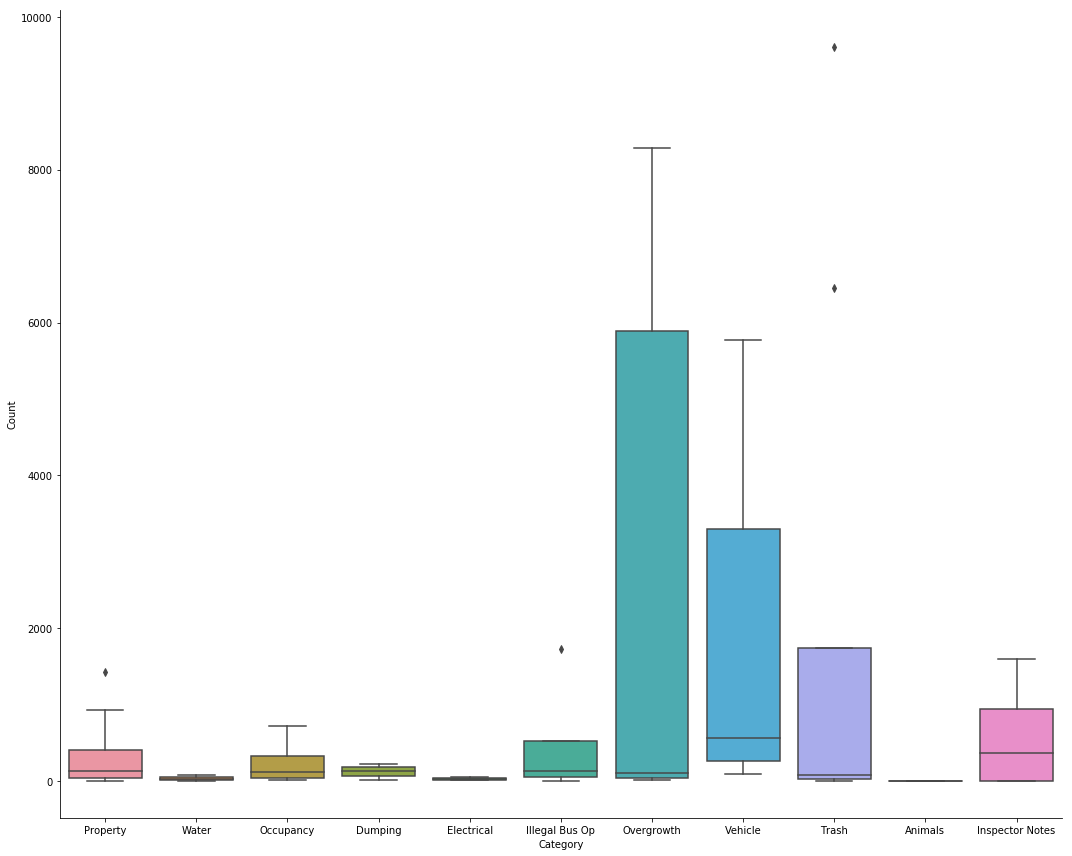

In [527]:
cat_count_box = sns.factorplot(x='Category', y = 'Count', data = cat_count_2, kind = 'box', size = 12, aspect = 1.25)
plt.show()

In [528]:
# From Mary's code to extract the lat and lng

lat_lng_pattern = re.compile(r'\((.*),\s*(.*)\)', flags=re.MULTILINE)

def extract_lat_lng(address):
    try:
        lat_lng_match = lat_lng_pattern.search(address)
        lat = float(lat_lng_match.group(1))
        lng = float(lat_lng_match.group(2))
        return (lat, lng)
    except:
        return (np.NaN, np.NaN)  
# address = '121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718, -86.861065)'        
# a = extract_lat_lng(address)
# print(a)

pre_lat_lngs =live_vi.loc[:,'Mapped Location']

lat_lngs = [extract_lat_lng(location) for location in pre_lat_lngs]
live_vi['lat_lng'] = lat_lngs
live_vi['lat'] = [lat for lat, lng in lat_lngs]
live_vi['lng'] = [lng for lat, lng in lat_lngs]
live_vi.head(10)
live_vi.to_csv('live_vi_coords.csv')

In [529]:
live_vi.head(20)

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,...,cat7,cat8,cat9,cat10,cat11,cat12,master_category,lat_lng,lat,lng
0,17-1156755,05/04/2017,05814005400,121 QUEENS LN,NASHVILLE,TN,37218.0,"LUSTER, PATRICIA",EMAIL,HOW TAKEN: EMAIL\nHigh grass,...,overgrowth,,,,,,overgrowth,"(36.213718, -86.861065)",36.213718,-86.861065
1,17-1165789,08/24/2017,08116056500,1007 11TH AVE N,NASHVILLE,TN,37208.0,"SARGENT, THOMAS JR. & CHRISTINE",OTHER SOURCE,High grass/weeds.,...,overgrowth,,,,,,overgrowth,"(36.170252, -86.795985)",36.170252,-86.795985
2,17-1157131,05/09/2017,10703001600,715 ERMAC DR,NASHVILLE,TN,37214.0,"H.H. HERITAGE INN OF NASHVILLE, LLC",PHONE,High grass & weeds,...,overgrowth,,,,,,overgrowth,"(36.146283, -86.688968)",36.146283,-86.688968
3,17-1161502,07/06/2017,07116009000,903 BLUE RIDGE DR,NASHVILLE,TN,37207.0,"SIMMONS, MABLINE P.",PHONE,Inoperable vehicle on row.,...,,vehicle,,,,,vehicle,"(36.196921, -86.754177)",36.196921,-86.754177
4,17-1153921,03/06/2017,11813018100,3605B MAYFLOWER PL,NASHVILLE,TN,37204.0,"ROBISON, ALEXANDER B. ET UX",PHONE,"Junk, trash & debris",...,,,trash,,,,trash,"(36.108083, -86.78269)",36.108083,-86.782690
5,17-1156955,05/08/2017,12001009000,1202 VULTEE BLVD,NASHVILLE,TN,37217.0,"BARRETT, MALCOLM L. JR.",PHONE,Couch in the front ditch,...,,,trash,,,,dumpingtrash,"(36.123753, -86.703178)",36.123753,-86.703178
6,17-1165799,08/24/2017,10409011200,3723 RICHLAND AVE,NASHVILLE,TN,37205.0,"DUNDON, THOMAS H. & LEAH A.",Codes Online,advertising more guest than allowed on permit,...,,,,,,,illegal_business_operations,"(36.134004, -86.830684)",36.134004,-86.830684
7,17-1154514,03/20/2017,11613007600,5971 POST RD,NASHVILLE,TN,37205.0,"ELLIS, STEPHEN NICHOLAS & ODOM, KIMBERLY SUZANNE",PHONE,mattresses and trash on side of road.,...,,,trash,,,,dumpingtrash,"(36.107168, -86.868488)",36.107168,-86.868488
8,15-1114246,02/11/2015,08102009600,1713 NUBELL ST,NASHVILLE,TN,37208.0,FREEDOM PROPERTIES,INSPECTOR REPORTED,VACANT/UNSECURED,...,,,,,,,prop,"(36.18863, -86.813236)",36.188630,-86.813236
9,17-1153010,02/10/2017,07103005200,2402 DICKERSON PIKE,NASHVILLE,TN,37207.0,"ALBARATI, AZIZ M. & HAUTER, AMIN",PHONE,Garage door unsecure - vacant building; food t...,...,,vehicle,,,,,propillegal_business_operationsvehicle,"(36.208316, -86.767331)",36.208316,-86.767331


In [530]:
def vi_column(col_name, new_df):
    vi_bool = live_vi[col_name].str.contains(str(['a-z']))
    new_df = live_vi[vi_bool == True]
    new_df = new_df.rename(columns = {col_name: 'category'})
    return(new_df)

In [531]:
prop_vi = vi_column(col_name = 'cat1', new_df = 'prop_vi')
water_vi = vi_column(col_name = 'cat2', new_df = 'water_vi')
occupancy_vi = vi_column(col_name = 'cat3', new_df = 'occupancy_vi')
dumping_vi = vi_column(col_name = 'cat4', new_df = 'dumping_vi')
electrical_vi = vi_column(col_name = 'cat5', new_df = 'electrical_vi')
illbusiness_vi = vi_column(col_name = 'cat6', new_df = 'illbusiness_vi')
overgrowth_vi = vi_column(col_name = 'cat7', new_df = 'overgrowth_vi')
vehicle_vi = vi_column(col_name = 'cat8', new_df = 'vehicle_vi')
trash_vi = vi_column(col_name = 'cat9', new_df = 'trash_vi')
animals_vi = vi_column(col_name = 'cat10', new_df = 'animals_vi')
inspectornotes_vi = vi_column(col_name = 'cat11', new_df = 'inspectornotes_vi')
misc_vi = vi_column(col_name = 'cat12', new_df = 'misc_vi')

In [532]:
frames = [prop_vi, water_vi, occupancy_vi, dumping_vi, electrical_vi, illbusiness_vi, overgrowth_vi, vehicle_vi, trash_vi, animals_vi, inspectornotes_vi, misc_vi] 

In [533]:
live_vi = pd.concat(frames, join = 'inner')

In [534]:
live_vi.head(20)
live_vi.to_csv('/Users/Justin/GIT/data-question-2-xtreme-united/vi_map_df.csv')